# DEMO

In this notebook the in Elastic-Net model (which was build in [this](./trainModel.ipynb) notebook) will be demonstared by using the testing data.

In [1]:
# install packages, if they are not installed
import sys
import subprocess
import pkg_resources

required = {'pandas', 'numpy', 'matplotlib', 'mlflow', 'scikit-learn'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout = subprocess.DEVNULL)

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mlflow
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def calc_metrics(actual_data: pd.Series, prediction_data: np.ndarray):
    """
    calculate the different metrics (mean squared error, root mean squared error, mean absolute error 
        and mean absolute percentage error) to evaluate the model accuracy.
    
    Params:
        actual_data (Series): the actual imported data
        prediction_data (ndarray): the from the model predicted data
    
    Returns:
        mse (Float): the calculated mean squared error value
        rmse (Float): the calculated root mean squared error value
        mae (Float): the claclulated mean absolute error value
        mape (FLoat): the calculated mean absolute percentage error value
    """
    mse = mean_squared_error(actual_data, prediction_data)
    rmse = mean_squared_error(actual_data, prediction_data, squared = False)
    mae = mean_absolute_error(actual_data, prediction_data)
    mape = np.mean(np.abs((actual_data - prediction_data) / actual_data)) * 100
    
    print('########## METRICS ##########')
    print('MSE:\t%s\nRMSE:\t%s\nMAE:\t%s\nMAPE:\t%s' % (mse, rmse, mae, mape))
    
    return mse, rmse, mae, mape

In [3]:
# get data
df = pd.read_csv('./data/WorldHappinessReport/2019.csv')
test_data = pd.read_csv('./data/test_data.csv')
# set new index for DataFrames
df.set_index('Country or region', inplace = True)
test_data.set_index('Country or region', inplace = True)
#df.head()
#test_data.head()

In [40]:
# define target feature and create feature list
target_feature = 'Score'
features_to_remove = [target_feature, 'Overall rank']
features = df.columns.to_list()
features = [feature for feature in features if feature not in features_to_remove]

In [41]:
# split testing data in features and target_feature
X_test = test_data[features]
y_test = test_data[target_feature]

## Import and demonstrate model

In [42]:
# import model with paramter alpha = 5.0 and l1_ratio = 10.0 from training notebook
best_model = 'runs:/35bd8450a7554e30951249b30de6d3cb/model'

# Load model as a PyFuncModel
model = mlflow.pyfunc.load_model(best_model)

# Predict on a Pandas DataFrame
pred = model.predict(X_test)

### Evaluate the model and the metrics results

In [1]:
# get errors of the prediction with the testing data
mse, rmse, mae, mape = calc_metrics(y_test, pred)

NameError: name 'calc_metrics' is not defined

The model has low errors, which means that it is pretty accurate.

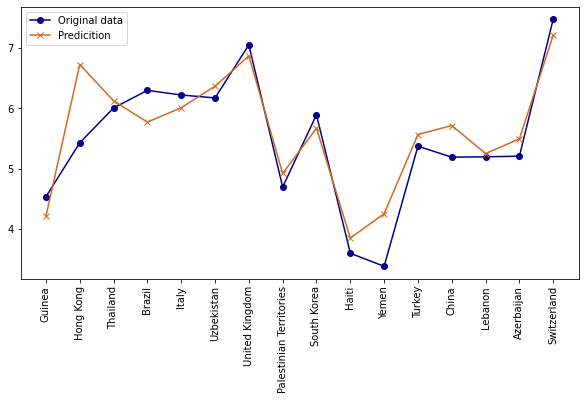

In [44]:
# plot the original datapoints and the predicted datapoints
fig, axs = plt.subplots(1, 1, figsize = (10, 5))
axs.plot(y_test, marker = 'o', color = 'darkblue')
axs.plot(pred, marker = 'x', color = 'chocolate')
axs.tick_params(axis = 'x', rotation = 90)
axs.legend(['Original data', 'Predicition'])

We can see that the datapoints are pretty accurate which reflects the result from the calculated metrics.</br>
Except for HongKong the the predicted happiness score isn't to far off compared to the actual datapoint, which is good.